## scikit-image

(512, 512, 3)


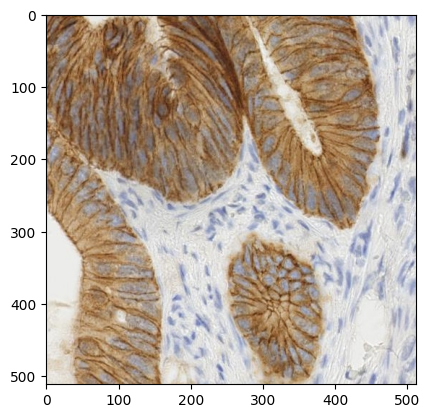

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed, hed2rgb

# Example IHC image
ihc_rgb = data.immunohistochemistry()
print(ihc_rgb.shape)

fig, ax = plt.subplots()
ax.imshow(ihc_rgb)

## separate stain

hematoxylin + eosin + diaminobenzidine (DAB)

In [17]:
# Separate the stains from the IHC image
ihc_hed = rgb2hed(ihc_rgb)
print(ihc_hed.shape)

(512, 512, 3)


In [19]:
h = ihc_hed[:, :, 0]
e = ihc_hed[:, :, 1]
d = ihc_hed[:, :, 2]

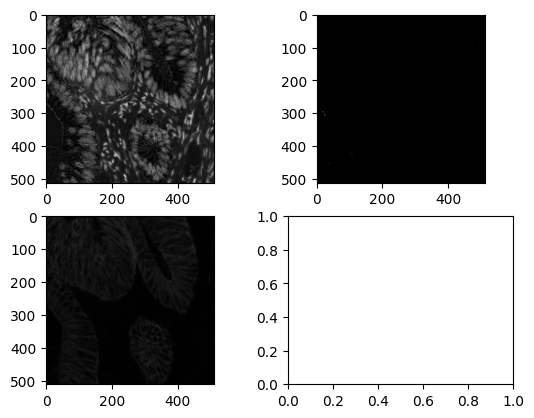

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2)
axs[0, 0].imshow(h, cmap='gray')
axs[0, 1].imshow(e, cmap='gray')
axs[1, 0].imshow(d, cmap='gray')

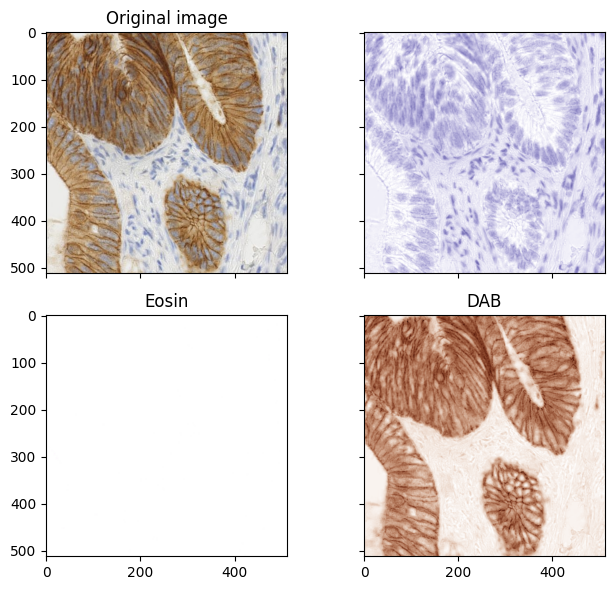

In [23]:
# Create an RGB image for each of the stains
null = np.zeros_like(ihc_hed[:, :, 0])
ihc_h = hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1))
ihc_e = hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1))
ihc_d = hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1))

# Display
fig, axes = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
axs = axes.ravel()

axs[0].imshow(ihc_rgb)
axs[0].set_title("Original image")

axs[1].imshow(ihc_h)
ax[1].set_title("Hematoxylin")

axs[2].imshow(ihc_e)
axs[2].set_title("Eosin")  # Note that there is no Eosin stain in this image

axs[3].imshow(ihc_d)
axs[3].set_title("DAB")

for a in ax.ravel():
    a.axis('off')

fig.tight_layout()

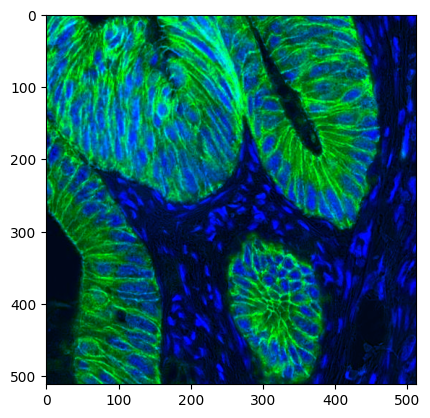

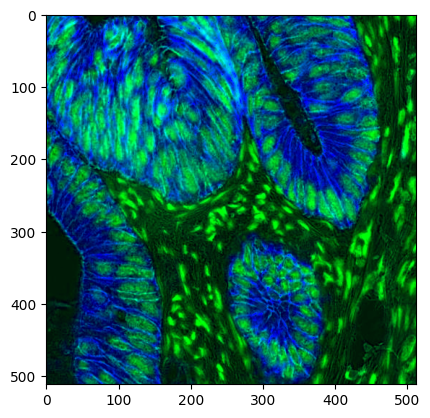

In [26]:
from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB channels and give them a fluorescence look
h2 = rescale_intensity(h, out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 0], 99)))
d2 = rescale_intensity(d, out_range=(0, 1),
                      in_range=(0, np.percentile(ihc_hed[:, :, 2], 99)))

zdh = np.dstack((null, d2, h2))
fig, ax = plt.subplots()
ax.imshow(zdh)


zdh = np.dstack((null, h2, d2, ))
fig, ax = plt.subplots()
ax.imshow(zdh)

